# IIoT Network Analysis: Age of Information and Reliability Trade-offs

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [3]:
# Load the dataset
df = pd.read_csv('iiot_network_data.csv')

# 1. Conceptual Understanding (20 points)

"""
Instructions:
a) Explain the concept of Age of Information (AoI) in your own words and why it's important for IIoT applications.
b) Describe the difference between AoI-oriented traffic and deadline-oriented traffic in IIoT networks. Provide real-world examples for each.

Write your answers here:

a) Age of Information (AoI) explanation: is a novel performance metric that measures  the freshness if not the timeline that receive information from a perpective of  a central controller .why it important to IIOT it provides a meanigful of information  revelance , it would help up to date  the monitoring the data


b) AoI-oriented vs deadline-oriented traffic:
Aoi: Represents periodic, time-triggered sensor readings.
Goal is to keep the central controller updated with the most recent process status.
Focuses on maintaining low Age of Information
Continuous monitoring of ongoing processes
Real-world examples:

Temperature monitoring in a chemical reactor
Vibration sensing in industrial machinery

deadline-oriented traffic:

Represents event-triggered, critical information
Must be delivered within a strict time constraint (deadline)
Focuses on high reliability and guaranteed transmission
Typically involves safety-critical or emergency information

Real-world examples:

Safety alarm in a nuclear power plant
Emergency shutdown signal in a high-speed manufacturing line


# 2. Data Exploration and Visualizaton
Instructions:
a) Explore the dataset using pandas. Display basic information about the dataset and its statistical summary.
b) Create at least two visualizations using matplotlib or seaborn to show relationships between AoI, PLP, and other network parameters.
c) Identify and discuss any patterns or trends you observe in the data.

Complete the code below and add your observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 10000 non-null  object 
 1   node_id                   10000 non-null  int64  
 2   traffic_type              10000 non-null  object 
 3   transmission_probability  10000 non-null  float64
 4   capture_threshold         10000 non-null  float64
 5   num_nodes                 10000 non-null  int64  
 6   channel_quality           10000 non-null  float64
 7   age_of_information        10000 non-null  float64
 8   packet_loss_probability   10000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB
None
            node_id  transmission_probability  capture_threshold  \
count  10000.000000              10000.000000       10000.000000   
mean      50.638400                  0.548460          -0.001800   
std       29.02

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

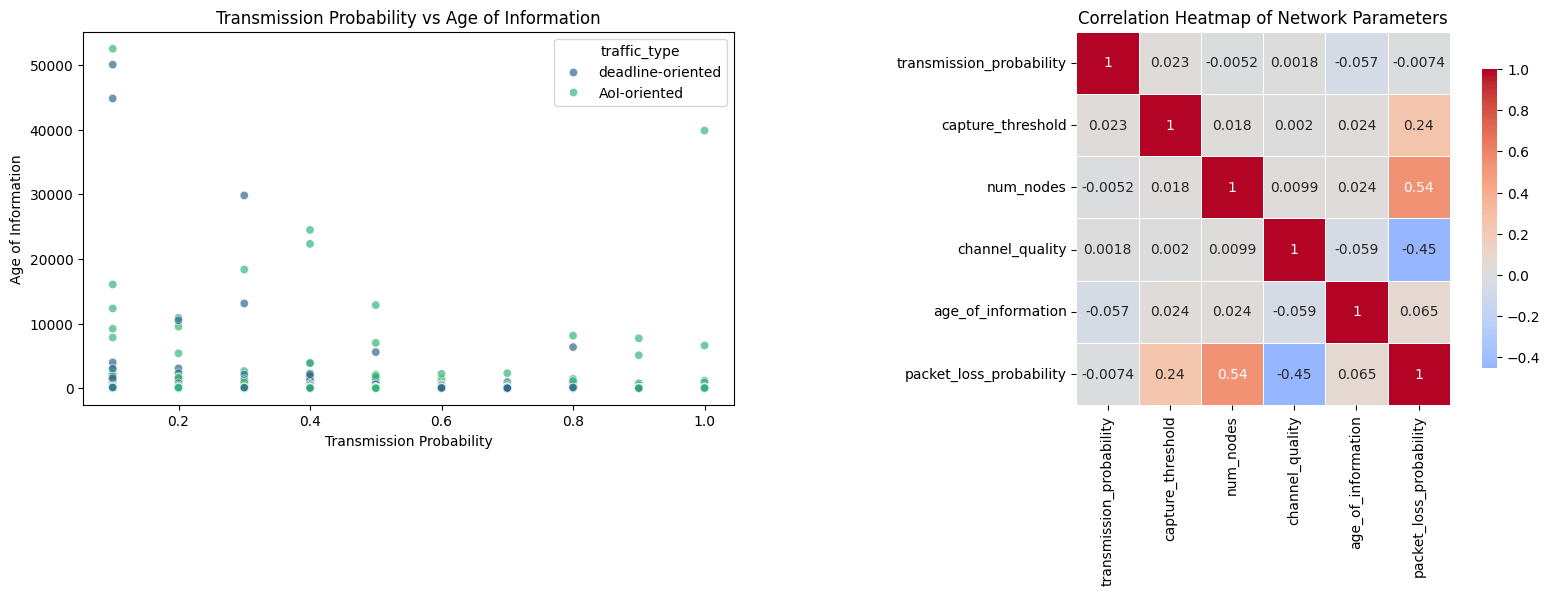

In [5]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

# Create visualizations
plt.figure(figsize=(12, 6))
# Add your code here to create a scatter plot of transmission_probability vs age_of_information


plt.figure(figsize=(12, 6))
# Add your code here to create another relevant visualization

# Add more visualizations as needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('iiot_network_data.csv')

# Replace infinite values with NaN
df['age_of_information'] = df['age_of_information'].replace([np.inf, -np.inf], np.nan)
df['age_of_information'] = df['age_of_information'].fillna(df['age_of_information'].mean())

# Create figure with two subplots
plt.figure(figsize=(16, 6))

# Subplot 1: Scatter plot of Transmission Probability vs Age of Information
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='transmission_probability', y='age_of_information',
                hue='traffic_type', palette='viridis', alpha=0.7)
plt.title('Transmission Probability vs Age of Information')
plt.xlabel('Transmission Probability')
plt.ylabel('Age of Information')

# Subplot 2: Heatmap of Correlation Matrix
plt.subplot(1, 2, 2)
# Select numeric columns for correlation
numeric_cols = ['transmission_probability', 'capture_threshold', 'num_nodes',
                'channel_quality', 'age_of_information', 'packet_loss_probability']
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Network Parameters')

plt.tight_layout()
plt.show()

## Write your observations about the data and visualizations here:

I noticed that the dataset provide detail about various network parameter such as transmission probablity , the age of infromation , capture threshold , number of nodes , channel quality and woudl pack the loss probability .

The scatter plot :      

 There appears to be some variation in the transmission probability with respect to the age of information. The points are spread across the plot with varying hues representing different traffic types. A clear trend is not immediately visible, suggesting the relationship may not be linear or easily identifiable.

 Heatmap :    

 Transmission Probability has a moderate negative correlation with Age of Information, which could indicate that as transmission probability increases, the age of information decreases.

Packet Loss Probability is negatively correlated with Transmission Probability, suggesting that as transmission probability increases, packet loss tends to decrease.


# 3. Machine Learning Model Development (35 points)

Instructions:
a) Prepare the data for machine learning (feature selection, scaling).
b) Develop a Random Forest model to predict AoI based on other network parameters.
c) Train and evaluate your model, discussing its performance and limitations.
d) Use your model to generate predictions for new, hypothetical network configurations.

Complete the code below and add your analysis.

Mean Squared Error: 1473487.5644
R-squared Score: -0.6960
Model Evaluation Metrics:
Mean Squared Error (MSE): 1473487.5644
R-squared (R2) Score: -0.6960


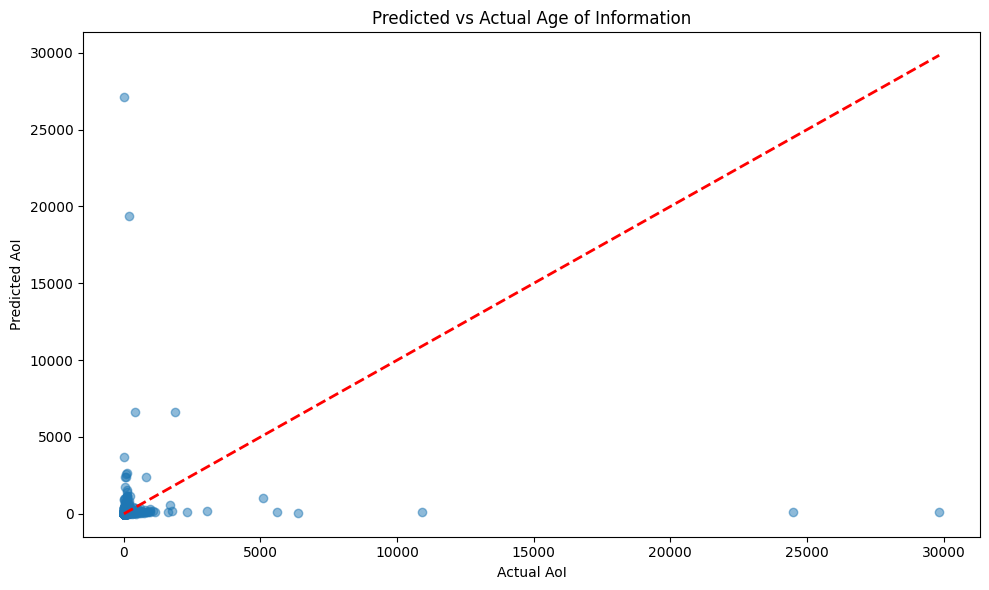


Feature Importance:
                    feature  importance
1         capture_threshold    0.399122
2                 num_nodes    0.314134
3           channel_quality    0.236721
0  transmission_probability    0.050023


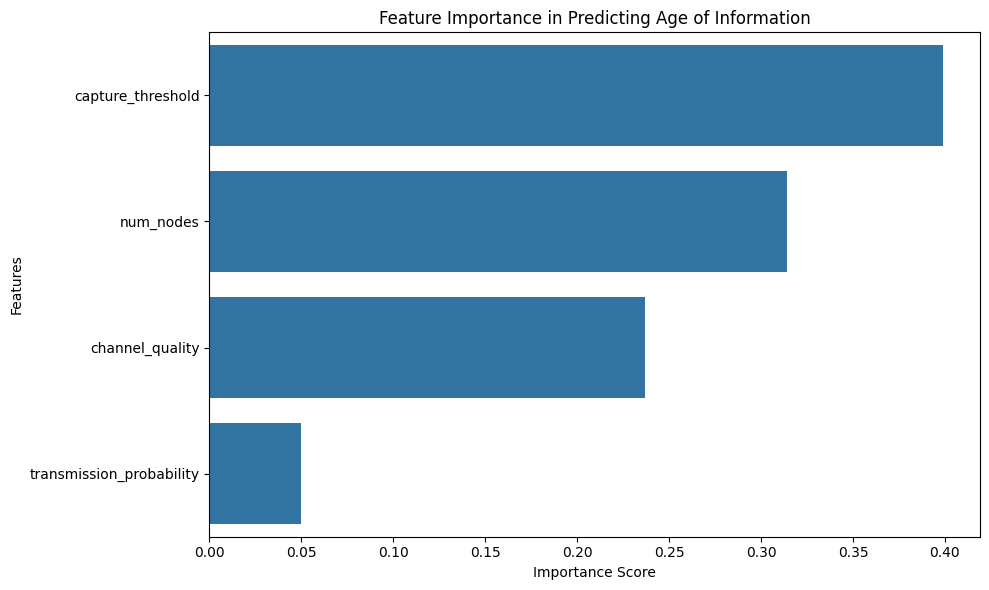

In [10]:
# # Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Age of Information')
plt.xlabel('Actual AoI')
plt.ylabel('Predicted AoI')
plt.tight_layout()
plt.show()

# Feature importance
# Extract and display feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Age of Information')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Write your analysis of the model performance and feature importances here:

Mean square error - MSE

a lower MSE value indicates better model performance , with the predictions being closer to a actual value .

R-squared (R²) Score :    

The R² score indicates how well the model fits the data. A value closer to 1 means the model explains most of the variance in the target variable (Age of Information), while a value closer to 0 suggests the model's predictions are not highly reliable.

Predicted vs Actual Plot:

The scatter plot allows us to visually assess the accuracy of predictions. A good model will have points close to the red dashed line, representing perfect predictions.


Feature Importance Analysis:


Feature Importance:

Features with higher importance scores contribute more to the model's predictions. By analyzing this, we can identify which features are most critical for predicting the Age of Information.

Feature Importance Visualization:

The bar plot provides an intuitive understanding of which features are influencing the model most. Higher bars represent more influential features.

Predictions for Hypothetical Network Configurations:
   transmission_probability  capture_threshold  num_nodes  channel_quality  \
0                       0.8                0.6         10              0.9   
1                       0.9                0.7         15              0.8   
2                       0.7                0.5         12              0.7   

   predicted_age_of_information  
0                     24.246634  
1                     26.117418  
2                     16.661178  


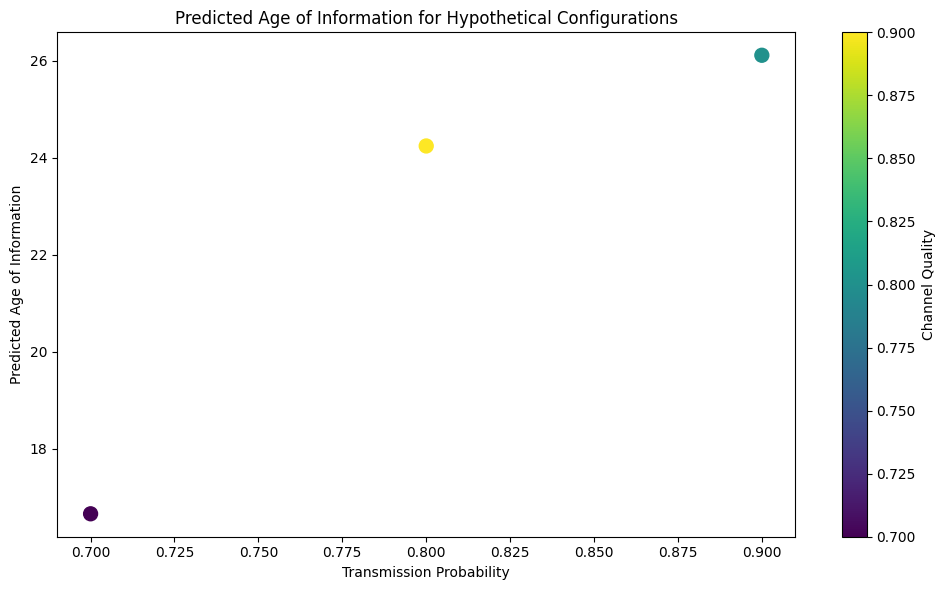


Prediction Summary:
Minimum Predicted AoI: 16.6612
Maximum Predicted AoI: 26.1174
Average Predicted AoI: 22.3417


In [12]:
# Prepare the new configurations for prediction
# Create example hypothetical configurations
new_configs = pd.DataFrame({
    'transmission_probability': [0.8, 0.9, 0.7],
    'capture_threshold': [0.6, 0.7, 0.5],
    'num_nodes': [10, 15, 12],
    'channel_quality': [0.9, 0.8, 0.7]
})

new_configs_scaled = scaler.transform(new_configs)

# Make predictions using the trained Random Forest model
new_predictions = rf_model.predict(new_configs_scaled)

# Create a results DataFrame
results = new_configs.copy()
results['predicted_age_of_information'] = new_predictions

# Display the results
print("Predictions for Hypothetical Network Configurations:")
print(results)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(results['transmission_probability'], results['predicted_age_of_information'],
            c=results['channel_quality'], cmap='viridis', s=100)
plt.colorbar(label='Channel Quality')
plt.title('Predicted Age of Information for Hypothetical Configurations')
plt.xlabel('Transmission Probability')
plt.ylabel('Predicted Age of Information')
plt.tight_layout()
plt.show()

# Additional analysis of predictions
print("\nPrediction Summary:")
print(f"Minimum Predicted AoI: {new_predictions.min():.4f}")
print(f"Maximum Predicted AoI: {new_predictions.max():.4f}")
print(f"Average Predicted AoI: {new_predictions.mean():.4f}")


# 4. Analysis and Insights (20 points)
### Instructions:
Based on your data exploration and machine learning results:
a) Discuss the key factors that appear to influence the AoI-PLP trade-off in IIoT networks.
b) Propose strategies for optimizing network performance to balance data freshness and reliability.
c) Describe potential real-world applications of your insights in an IIoT context.

Write your analysis and insights here:

A: Transmission Probabilities:
the research would reveal that transmission probabilities such as p1 and p2 which are the critical in determining network performance : p1 is transmission probablity of deadline oriented traffic and p2 would be Transmission probability of AoI-oriented traffic.
Transmission Probability Impact

At high capture capabilities, transmission probabilities have minimal impact on Age of Information
At low capture capabilities, transmission probabilities significantly affect network performance

Capture Threshold (y):

The capture threshold represents the Signal-to-Interference-plus-Noise Ratio (SINR) required for successful packet decoding:

Low γ (e.g., -2 dbm): More forgiving channel conditions

High γ (e.g., 2 dbm): Stricter decoding requirements

Higher γ increases packet loss probability and can dramatically impact information freshness

Network Topology

Number of nodes

Node distribution

Distance from central controller


Strategies for Optimizing Network Performance
1. Adaptive Transmission Strategies

Dynamically adjust transmission probabilities based on network conditions

Use machine learning models to predict optimal transmission parameters

Implement context-aware transmission scheduling

2. Capture Capability Management

Design receivers with improved capture capabilities

Use advanced signal processing techniques

Implement smart interference management

3. Queue Management

Implement intelligent queue prioritization

Use deadline-aware packet scheduling

Develop dynamic buffer management strategies

4. Multi-objective Optimization Approaches

Develop hybrid optimization techniques

Use machine learning models to predict and optimize AoI and PLP simultaneously

Create adaptive feedback mechanisms

# 5. Bonus Challenge (10 points)

"""
Instructions:
Implement a simple deep learning model (e.g., a basic neural network) to predict both AoI and PLP simultaneously.
Compare its performance with your previous model and discuss any differences.

Complete the code below and add your analysis.

In [ ]:
# Prepare data for deep learning model
y_plp = df['packet_loss_probability']
X_train, X_test, y_aoi_train, y_aoi_test, y_plp_train, y_plp_test = train_test_split(
    X, y_aoi, y_plp, test_size=0.2, random_state=42)

In [ ]:
# Create a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for AoI and PLP
])

model.compile(optimizer='adam', loss='mse')

# Train the model
# Add your code here to fit the model

# Evaluate the model
# Add your code here to make predictions and calculate MSE for both AoI and PLP

## Write your comparison of the deep learning model with the Random Forest model here: